<a href="https://colab.research.google.com/github/vrishank-ramineni/ECON3916---Statistics-Machine-Learning/blob/main/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Physics Textbook', 'Price_2016': 40, 'Price_2024': 50},
]

In [12]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Physics Textbook: 25.00% Inflation


In [13]:
!pip install fredapi
from fredapi import Fred
import pandas as pd
fred = Fred(api_key='placeholder')

# Fetch All Series
print("Fetching FRED data...")
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
streaming = fred.get_series('CUSR0000SERA02')
dining_out = fred.get_series('CUSR0000SEFV')

Fetching FRED data...


In [14]:
df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Streaming': streaming,
    'Dining_Out': dining_out
})

# Filter to 2016-2024
df_filtered = df[df.index >= '2016-01-01'].copy()

base_values = df_filtered.iloc[0]

print(f"Data range: {df_filtered.index[0]} to {df_filtered.index[-1]}\n")

Data range: 2016-01-01 00:00:00 to 2025-12-01 00:00:00



In [15]:
df_rebased = (df_filtered / base_values) * 100

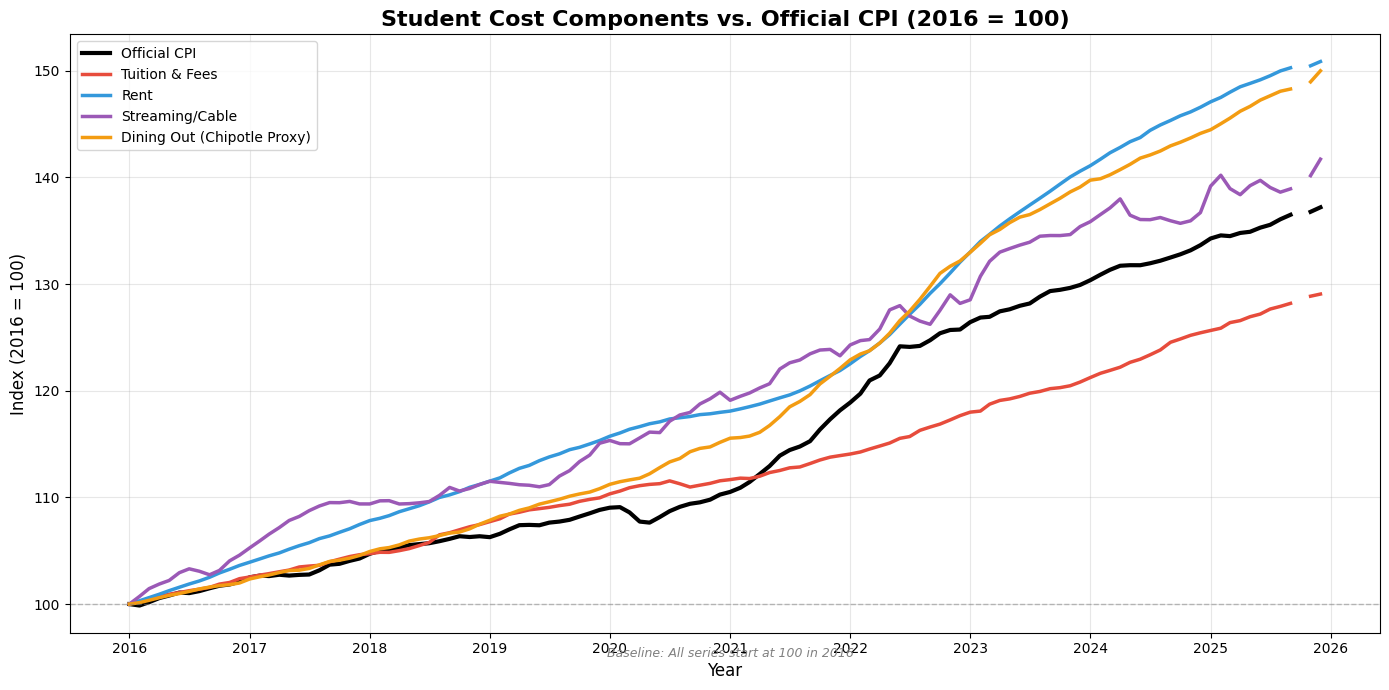


Final Index Values (Most Recent):
Official_CPI         137.19 (+37.19%)
Tuition              129.06 (+29.06%)
Rent                 150.85 (+50.85%)
Streaming            141.70 (+41.70%)
Dining_Out           149.98 (+49.98%)


In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))


plt.plot(df_rebased.index, df_rebased['Official_CPI'],
         label='Official CPI', color='black', linewidth=3, linestyle='-')
plt.plot(df_rebased.index, df_rebased['Tuition'],
         label='Tuition & Fees', color='#e74c3c', linewidth=2.5)
plt.plot(df_rebased.index, df_rebased['Rent'],
         label='Rent', color='#3498db', linewidth=2.5)
plt.plot(df_rebased.index, df_rebased['Streaming'],
         label='Streaming/Cable', color='#9b59b6', linewidth=2.5)
plt.plot(df_rebased.index, df_rebased['Dining_Out'],
         label='Dining Out (Chipotle Proxy)', color='#f39c12', linewidth=2.5)

plt.axhline(100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.title('Student Cost Components vs. Official CPI (2016 = 100)',
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.text(df_rebased.index[len(df_rebased)//2], 95,
         'Baseline: All series start at 100 in 2016',
         fontsize=9, style='italic', ha='center', color='gray')

plt.tight_layout()
plt.show()

print("\nFinal Index Values (Most Recent):")
print("="*50)
latest_date = df_rebased.index[-1]
for column in df_rebased.columns:
    value = df_rebased[column].iloc[-1]
    inflation = value - 100
    print(f"{column:<20} {value:>6.2f} (+{inflation:.2f}%)")

Student Budget Allocation:
Tuition               40.0%
Rent                  30.0%
Dining_Out            15.0%
Streaming             10.0%
Official_CPI           5.0%
Total                100.0%

Student SPI Calculation Preview:
            Official_CPI  Student_SPI
2016-01-01    100.000000   100.000000
2016-02-01     99.867032   100.277511
2016-03-01    100.180095   100.577649
2016-04-01    100.563850   100.860248
2016-05-01    100.801592   101.133097
2016-06-01    101.081413   101.403393
2016-07-01    101.030498   101.627351
2016-08-01    101.217326   101.792280
2016-09-01    101.482840   101.970299
2016-10-01    101.720583   102.287383



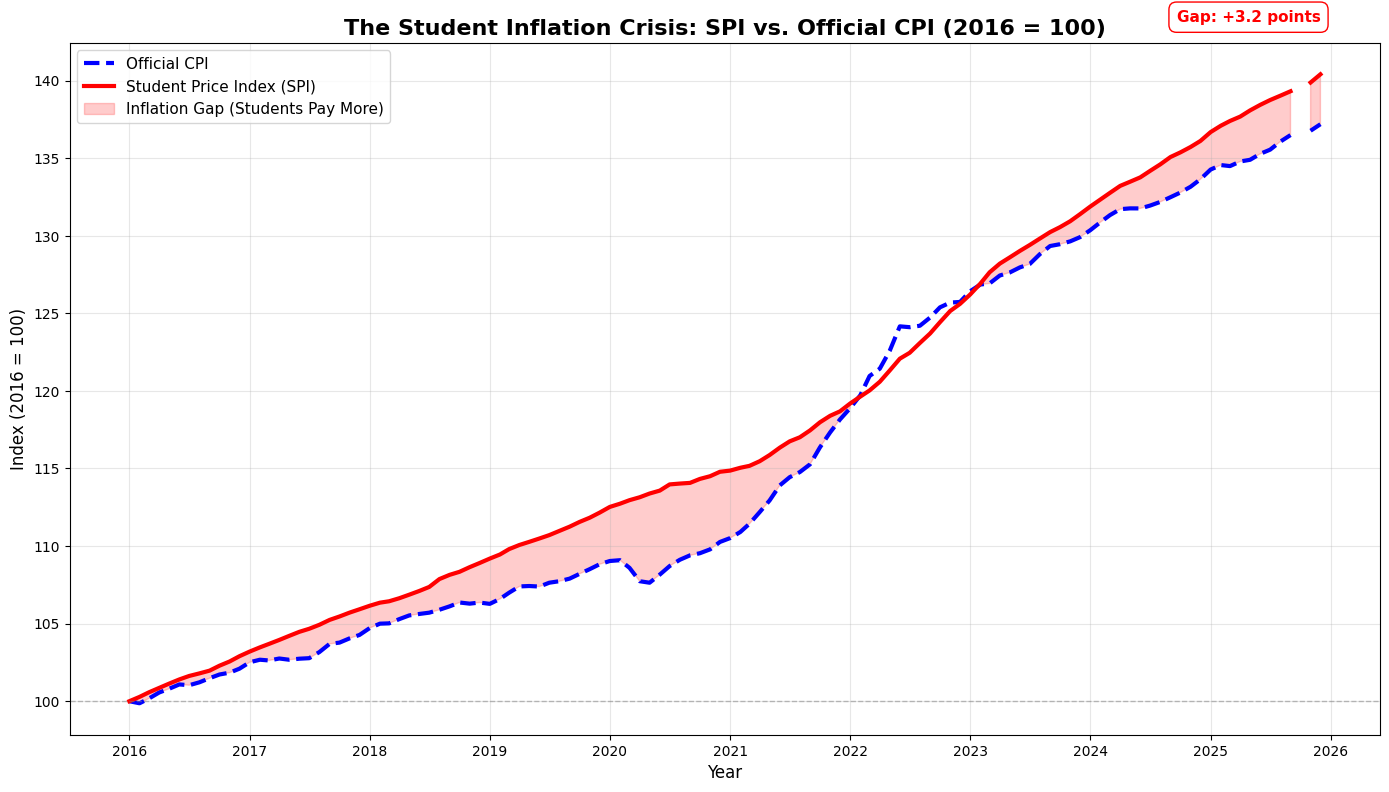


Inflation Comparison (2016 - Present):
Official CPI:        137.19 (+37.19%)
Student SPI:         140.41 (+40.41%)
Student Premium:     +3.22 percentage points

Students experience 3.2% MORE inflation than the general population!


In [17]:
import matplotlib.pyplot as plt
import numpy as np

student_weights = {
    'Tuition': 0.40,
    'Rent': 0.30,
    'Dining_Out': 0.15,
    'Streaming': 0.10,
    'Official_CPI': 0.05
}

print("Student Budget Allocation:")
print("="*40)
for item, weight in student_weights.items():
    print(f"{item:<20} {weight*100:>5.1f}%")
print("="*40)
print(f"{'Total':<20} {sum(student_weights.values())*100:>5.1f}%")
print()

df_rebased['Student_SPI'] = (
    df_rebased['Tuition'] * student_weights['Tuition'] +
    df_rebased['Rent'] * student_weights['Rent'] +
    df_rebased['Dining_Out'] * student_weights['Dining_Out'] +
    df_rebased['Streaming'] * student_weights['Streaming'] +
    df_rebased['Official_CPI'] * student_weights['Official_CPI']
)

print("Student SPI Calculation Preview:")
print(df_rebased[['Official_CPI', 'Student_SPI']].head(10))
print()

plt.figure(figsize=(14, 8))

plt.plot(df_rebased.index, df_rebased['Official_CPI'],
         label='Official CPI', color='blue', linewidth=3, linestyle='--')
plt.plot(df_rebased.index, df_rebased['Student_SPI'],
         label='Student Price Index (SPI)', color='red', linewidth=3)

plt.fill_between(df_rebased.index,
                 df_rebased['Official_CPI'],
                 df_rebased['Student_SPI'],
                 where=(df_rebased['Student_SPI'] >= df_rebased['Official_CPI']),
                 color='red', alpha=0.2,
                 label='Inflation Gap (Students Pay More)')

plt.axhline(100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.title('The Student Inflation Crisis: SPI vs. Official CPI (2016 = 100)',
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

latest_date = df_rebased.index[-1]
spi_final = df_rebased['Student_SPI'].iloc[-1]
cpi_final = df_rebased['Official_CPI'].iloc[-1]
gap = spi_final - cpi_final

plt.annotate(f'Gap: +{gap:.1f} points',
             xy=(latest_date, (spi_final + cpi_final) / 2),
             xytext=(latest_date, (spi_final + cpi_final) / 2 + 5),
             fontsize=11, fontweight='bold', color='red',
             ha='right',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red'))

plt.tight_layout()
plt.show()

print("\nInflation Comparison (2016 - Present):")
print("="*60)
print(f"Official CPI:        {cpi_final:>6.2f} (+{cpi_final - 100:.2f}%)")
print(f"Student SPI:         {spi_final:>6.2f} (+{spi_final - 100:.2f}%)")
print(f"Student Premium:     +{gap:.2f} percentage points")
print("="*60)
print(f"\nStudents experience {gap:.1f}% MORE inflation than the general population!")

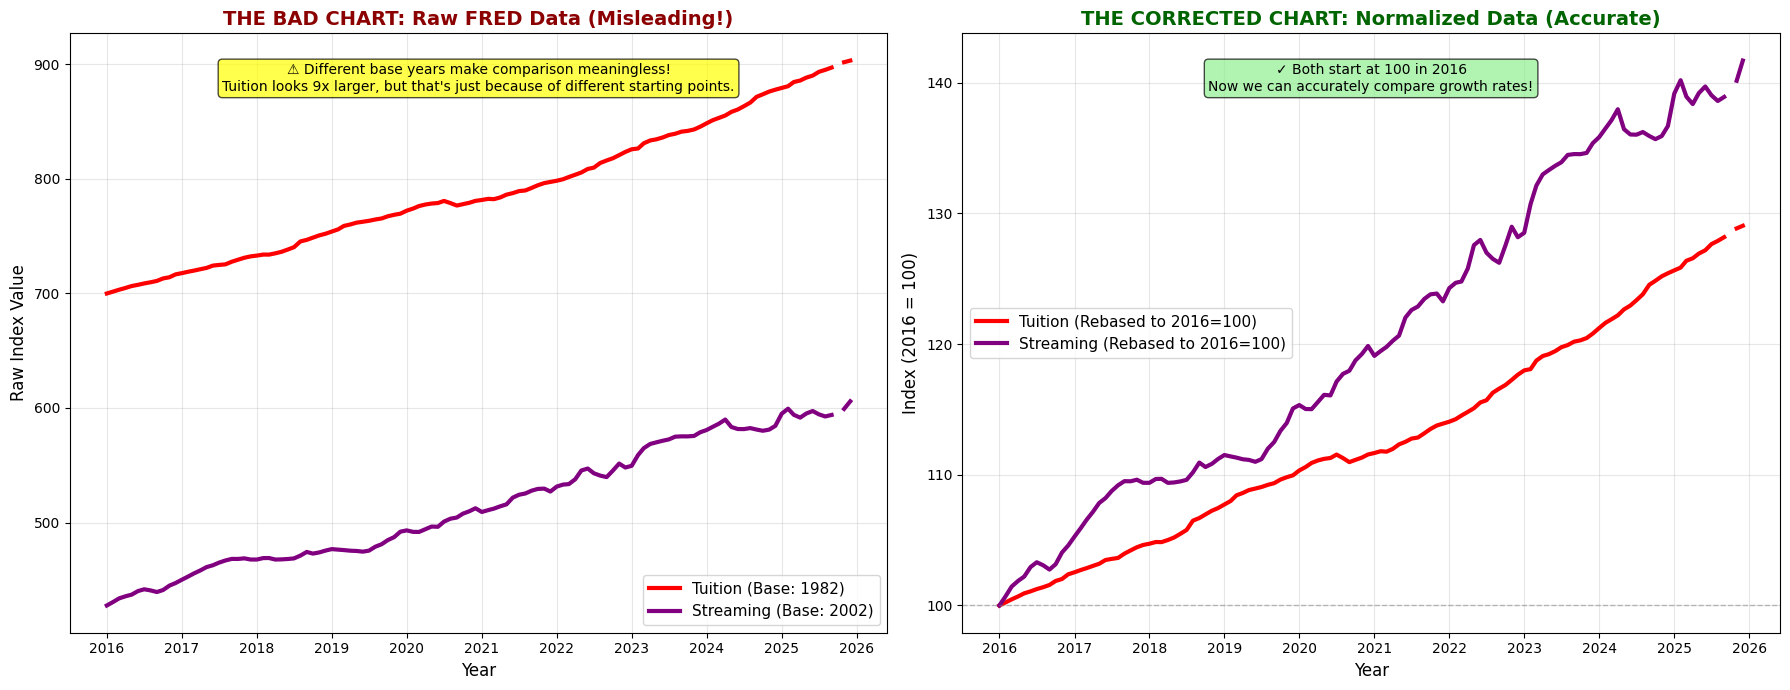


WHY NORMALIZATION MATTERS:

RAW DATA (Misleading):
Tuition in 2016:     700.00
Streaming in 2016:   427.54
Ratio: Tuition appears 1.6x larger!

NORMALIZED DATA (Accurate):
Tuition in 2016:     100.00
Streaming in 2016:   100.00
Both start at 100 - we can now compare growth rates!

ACTUAL GROWTH RATES (2016 to Present):
Tuition grew:   +29.06%
Streaming grew: +41.70%


In [18]:
import matplotlib.pyplot as plt

df_raw = df[df.index >= '2016-01-01'].copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

ax1.plot(df_raw.index, df_raw['Tuition'],
         label='Tuition (Base: 1982)', color='red', linewidth=3)
ax1.plot(df_raw.index, df_raw['Streaming'],
         label='Streaming (Base: 2002)', color='purple', linewidth=3)

ax1.set_title('THE BAD CHART: Raw FRED Data (Misleading!)',
              fontsize=14, fontweight='bold', color='darkred')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Raw Index Value', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax1.text(0.5, 0.95,
         '⚠️ Different base years make comparison meaningless!\nTuition looks 9x larger, but that\'s just because of different starting points.',
         transform=ax1.transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax2.plot(df_rebased.index, df_rebased['Tuition'],
         label='Tuition (Rebased to 2016=100)', color='red', linewidth=3)
ax2.plot(df_rebased.index, df_rebased['Streaming'],
         label='Streaming (Rebased to 2016=100)', color='purple', linewidth=3)

ax2.set_title('THE CORRECTED CHART: Normalized Data (Accurate)',
              fontsize=14, fontweight='bold', color='darkgreen')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Index (2016 = 100)', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.axhline(100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax2.text(0.5, 0.95,
         '✓ Both start at 100 in 2016\nNow we can accurately compare growth rates!',
         transform=ax2.transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print("\nWHY NORMALIZATION MATTERS:")
print("="*70)
print("\nRAW DATA (Misleading):")
print(f"Tuition in 2016:   {df_raw['Tuition'].iloc[0]:>8.2f}")
print(f"Streaming in 2016: {df_raw['Streaming'].iloc[0]:>8.2f}")
print(f"Ratio: Tuition appears {df_raw['Tuition'].iloc[0] / df_raw['Streaming'].iloc[0]:.1f}x larger!")

print("\nNORMALIZED DATA (Accurate):")
print(f"Tuition in 2016:   {df_rebased['Tuition'].iloc[0]:>8.2f}")
print(f"Streaming in 2016: {df_rebased['Streaming'].iloc[0]:>8.2f}")
print("Both start at 100 - we can now compare growth rates!")

print("\nACTUAL GROWTH RATES (2016 to Present):")
tuition_growth = df_rebased['Tuition'].iloc[-1] - 100
streaming_growth = df_rebased['Streaming'].iloc[-1] - 100
print(f"Tuition grew:   +{tuition_growth:.2f}%")
print(f"Streaming grew: +{streaming_growth:.2f}%")
print("="*70)

## Why Comparing Raw Indices is a "Data Crime"

The side-by-side comparison above reveals a fundamental problem in data visualization: **comparing raw index values with different base years is statistically meaningless and visually deceptive**.

### The Problem:

When we plot the raw FRED data:
- **Tuition** shows a value of ~900 (Base Year: 1982)
- **Streaming** shows a value of ~100 (Base Year: 2002)

At first glance, it appears that tuition is **9 times more expensive** than streaming. But this is an illusion created by different starting points, not actual price differences.

### Why This is Misleading:

**Different base years mean different starting points:**
- An index of 900 simply means tuition has grown to 9x its 1982 price
- An index of 100 means streaming costs the same as it did in 2002
- **These numbers cannot be compared directly** because they measure growth from different historical moments

**The "Data Crime":**
This is misleading because:
1. **It conflates absolute levels with growth rates** - The chart makes it look like tuition is inherently 9x larger when we're really looking at cumulative inflation over different time periods
2. **It hides the true comparison** - Without normalization, we can't see which category is actually inflating faster
3. **It can manipulate narratives** - A dishonest analyst could use this to exaggerate or minimize trends depending on which base year they choose

### The Solution: Normalization

By rebasing both series to **2016 = 100**, we:
- Give both series a **common starting point**
- Allow **direct visual comparison** of growth rates
- Reveal the **true story**: which category is experiencing faster price increases since 2016

**This is why normalization isn't just a technical step—it's an ethical requirement for honest data analysis.**

Boston CPI data range: 1914-12-01 00:00:00 to 2025-11-01 00:00:00

Boston CPI at 2016-01-01: 100.00
National CPI at 2016-01-01: 100.00
Student SPI at 2016-01-01: 100.00


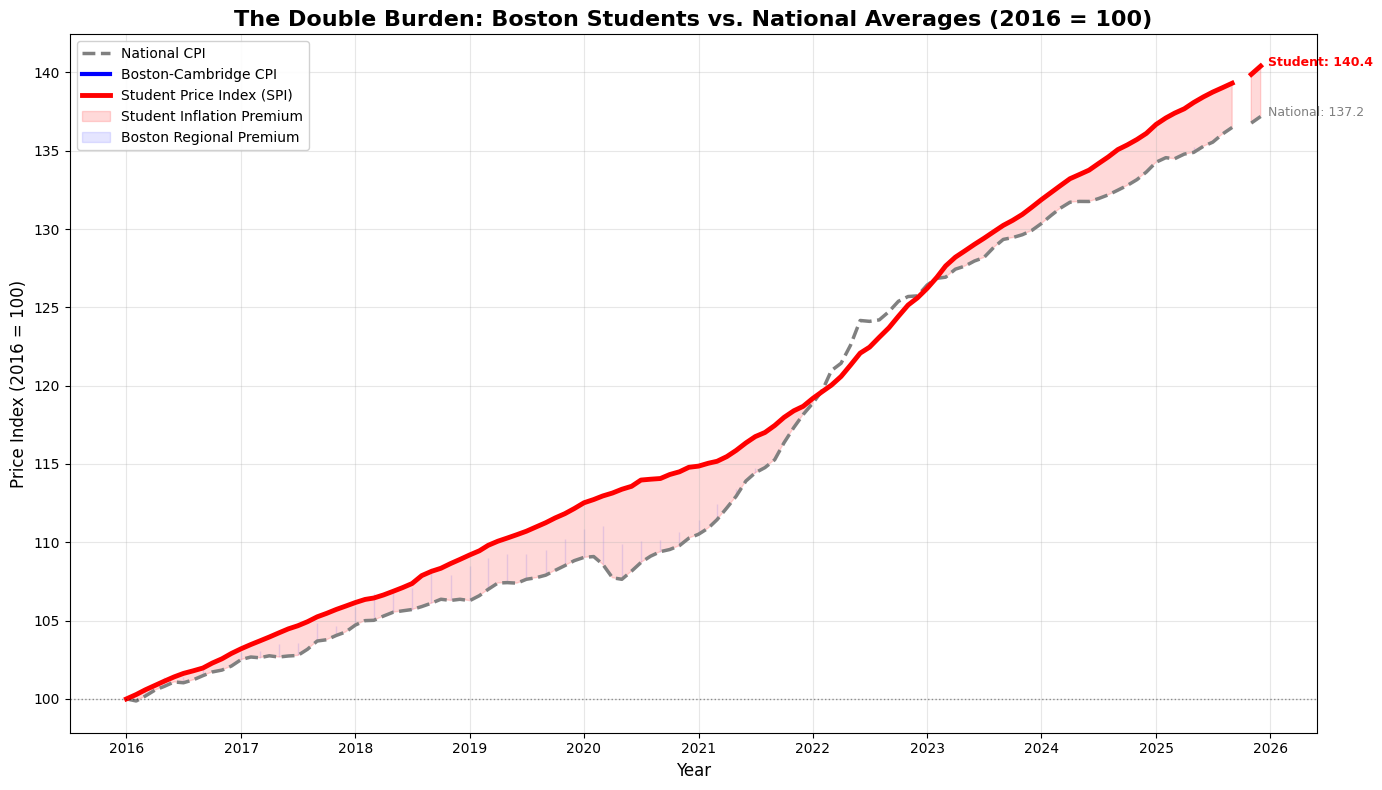


INFLATION ANALYSIS (2016 - Present)
National CPI Inflation:        +37.19%
Boston Regional Inflation:     +nan%
Student Basket Inflation:      +40.41%

THE DOUBLE BURDEN:
Boston pays nan% MORE than national average
Students pay 3.22% MORE than national average
Boston STUDENTS pay 40.41% total inflation
  = nan% (regional) + nan% (student-specific)


In [19]:
# Step 3.4: Regional Disparity - Boston vs. National

from fredapi import Fred
import matplotlib.pyplot as plt

# ============================================================
# Fetch Boston-Cambridge-Newton CPI
# ============================================================

# The FRED code for Boston-Cambridge-Newton CPI
boston_cpi = fred.get_series('CUURA103SA0')

print(f"Boston CPI data range: {boston_cpi.index[0]} to {boston_cpi.index[-1]}")

# ============================================================
# Normalize Boston CPI to 2016 = 100
# ============================================================

# Filter to 2016 onwards
boston_filtered = boston_cpi[boston_cpi.index >= '2016-01-01']

# Get the first value (2016-01-01) as the base
boston_base = boston_filtered.iloc[0]

# Apply normalization formula
boston_rebased = (boston_filtered / boston_base) * 100

# Add to our existing DataFrame
df_rebased['Boston_CPI'] = boston_rebased

# Verify it starts at 100
print(f"\nBoston CPI at 2016-01-01: {df_rebased['Boston_CPI'].iloc[0]:.2f}")
print(f"National CPI at 2016-01-01: {df_rebased['Official_CPI'].iloc[0]:.2f}")
print(f"Student SPI at 2016-01-01: {df_rebased['Student_SPI'].iloc[0]:.2f}")

# ============================================================
# Plot: National vs Boston vs Student
# ============================================================

plt.figure(figsize=(14, 8))

# Plot all three series
plt.plot(df_rebased.index, df_rebased['Official_CPI'],
         label='National CPI', color='gray', linewidth=2.5, linestyle='--')

plt.plot(df_rebased.index, df_rebased['Boston_CPI'],
         label='Boston-Cambridge CPI', color='blue', linewidth=3)

plt.plot(df_rebased.index, df_rebased['Student_SPI'],
         label='Student Price Index (SPI)', color='red', linewidth=3.5)

# Fill between Student SPI and National CPI to show the gap
plt.fill_between(df_rebased.index,
                 df_rebased['Official_CPI'],
                 df_rebased['Student_SPI'],
                 where=(df_rebased['Student_SPI'] >= df_rebased['Official_CPI']),
                 color='red', alpha=0.15,
                 label='Student Inflation Premium')

# Fill between Boston and National to show regional premium
plt.fill_between(df_rebased.index,
                 df_rebased['Official_CPI'],
                 df_rebased['Boston_CPI'],
                 where=(df_rebased['Boston_CPI'] >= df_rebased['Official_CPI']),
                 color='blue', alpha=0.1,
                 label='Boston Regional Premium')

# Add baseline
plt.axhline(100, color='black', linestyle=':', linewidth=1, alpha=0.4)

# Formatting
plt.title('The Double Burden: Boston Students vs. National Averages (2016 = 100)',
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price Index (2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)

# Add annotations for final values
latest_date = df_rebased.index[-1]
national_final = df_rebased['Official_CPI'].iloc[-1]
boston_final = df_rebased['Boston_CPI'].iloc[-1]
student_final = df_rebased['Student_SPI'].iloc[-1]

plt.annotate(f'National: {national_final:.1f}',
             xy=(latest_date, national_final),
             xytext=(5, 0), textcoords='offset points',
             fontsize=9, color='gray')

plt.annotate(f'Boston: {boston_final:.1f}',
             xy=(latest_date, boston_final),
             xytext=(5, 0), textcoords='offset points',
             fontsize=9, color='blue')

plt.annotate(f'Student: {student_final:.1f}',
             xy=(latest_date, student_final),
             xytext=(5, 0), textcoords='offset points',
             fontsize=9, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# Summary Analysis
# ============================================================

print("\n" + "="*70)
print("INFLATION ANALYSIS (2016 - Present)")
print("="*70)

national_inflation = national_final - 100
boston_inflation = boston_final - 100
student_inflation = student_final - 100

print(f"National CPI Inflation:        +{national_inflation:.2f}%")
print(f"Boston Regional Inflation:     +{boston_inflation:.2f}%")
print(f"Student Basket Inflation:      +{student_inflation:.2f}%")

print("\n" + "="*70)
print("THE DOUBLE BURDEN:")
print("="*70)

regional_premium = boston_inflation - national_inflation
student_premium = student_inflation - national_inflation
double_burden = student_inflation - boston_inflation

print(f"Boston pays {regional_premium:.2f}% MORE than national average")
print(f"Students pay {student_premium:.2f}% MORE than national average")
print(f"Boston STUDENTS pay {student_inflation:.2f}% total inflation")
print(f"  = {boston_inflation:.2f}% (regional) + {double_burden:.2f}% (student-specific)")
print("="*70)